<a href="https://colab.research.google.com/github/MariaBertolin/lineartanimdata/blob/main/lineartanimdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. SETUP ENVIRONMENT

NOTE: Select CANCEL when asked to restart session

In [1]:
#lineartanimdata repo, without sketchkeras
%cd /content
!rm -rf *
!git clone https://github.com/MariaBertolin/lineartanimdata.git
%cd lineartanimdata
#setup SAM2
%cd sam2
!bash script/install.sh
!pip install -e .
%cd checkpoints
!./download_ckpts.sh
%cd ../..
#install other libraries
!pip install matplotlib==3.9.2
!pip install opencv-python==3.4.17.61
!pip install "numpy<1.24"
#sketchKeras
!mkdir weights
%cd weights
!gdown 1Zo88NmWoAitO7DnyBrRhKXPcHyMAZS97
%cd ..

/content
Cloning into 'lineartanimdata'...
remote: Enumerating objects: 1332, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 1332 (delta 46), reused 0 (delta 0), pack-reused 1172 (from 2)
Receiving objects: 100% (1332/1332), 70.32 MiB | 43.83 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/lineartanimdata
/content/lineartanimdata/sam2
bash: script/install.sh: No such file or directory
Obtaining file:///content/lineartanimdata/sam2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-run

/content/lineartanimdata/sam2/checkpoints
--2025-01-05 12:42:09--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.24.51, 3.163.24.93, 3.163.24.72, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.24.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   221MB/s    in 0.7s    

2025-01-05 12:42:10 (221 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2025-01-05 12:42:10--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.24.51, 3.163.24.93, 3.163.24.72, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.24.51|:443... connected.
HTTP request sent, awaiting response... 200 OK


/content/lineartanimdata/weights
Downloading...
From (original): https://drive.google.com/uc?id=1Zo88NmWoAitO7DnyBrRhKXPcHyMAZS97
From (redirected): https://drive.google.com/uc?id=1Zo88NmWoAitO7DnyBrRhKXPcHyMAZS97&confirm=t&uuid=bb19c79a-3a3f-4d15-9487-e65efc4f2250
To: /content/lineartanimdata/weights/model.pth
100% 74.6M/74.6M [00:00<00:00, 80.8MB/s]
/content/lineartanimdata


#2. SETUP SCENE

Each scene has a folder with name <scene> within data/scenes containing the input video there, named footage.mp4.

A scene named "test" already exist to enable doing a fast test.

In [2]:
#The name of the scene (change it if you want to upload your own video)
# NO CAL FER SEGMENTACIÓ AMB LA PROVA, JA INCORPORA ELS FITXERS EXTRETS PER SAM2
# (per facilitar les proves de l'alternativa al sketchkeras)
scene = "prova"

##(OPTIONAL) UPLOAD YOUR OWN VIDEO

*(You can skip the following code block to run a fast demo.)*

You can create a new scene by uploading a video from your computer. A new folder fill be created within data/scenes with the video there, renamed to footage.mp4.

In [8]:
#Run this code block to upload an input video from your computer
scene = "simpsons"
import io
import pandas as pd
from google.colab import files
print("Choose a video file from your computer.")
uploaded = files.upload()
video_file=[key for key in uploaded.keys()][0]
!mkdir ./data/scenes/{scene}
!cp "{video_file}" data/scenes/{scene}/footage.mp4

Choose a video file from your computer.


IndexError: list index out of range

#3. SPLIT THE VIDEO INTO FRAMES



In [4]:
!rm -rf ./data/scenes/{scene}/imagesFull
!mkdir ./data/scenes/{scene}/imagesFull
!./subsample.sh /content/lineartanimdata/data/scenes/{scene} 0

mkdir: cannot create directory ‘imagesFull’: File exists
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --en

Check the first frame:

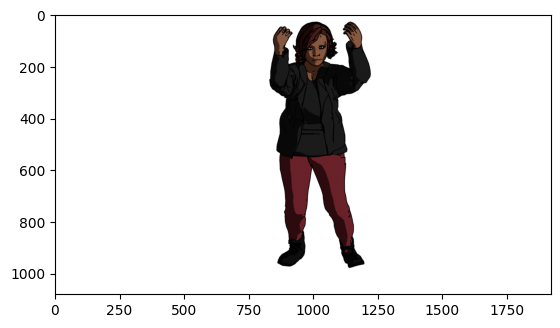

In [49]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
image_path = 'data/scenes/'+scene+'/imagesFull/001.jpg'
image = Image.open(image_path)  # Uncomment this line if using PIL

preproc_image = cv2.imread(image_path)
# Smoothening filter, removes noise sharpens edges. Test to see if there's a visible effect. Further tests on local!!
# smoothed_image = cv2.bilateralFilter(preproc_image,9,150,150)

plt.imshow(image)
plt.show()
# plt.imshow(smoothed_image)
# plt.show()

#4. SEGMENTATION

## Find proper positive and negative coordinates for the mask (for the first frame)

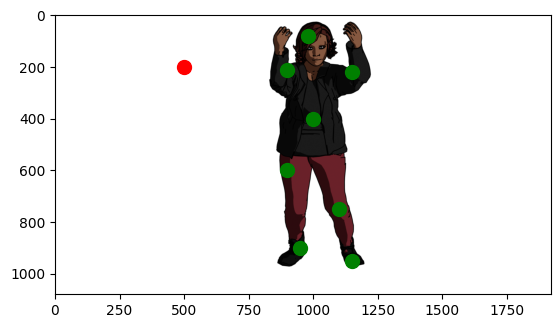

In [73]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

masks_points = []
mask0_points = []
mask0_labels = []

#positive points
mask0_points.append([1000,400])
mask0_labels.append(1)

mask0_points.append([980,80]) #apple 1
mask0_labels.append(1)

mask0_points.append([900,600]) #apple 2
mask0_labels.append(1)

mask0_points.append([1100,750]) #apple 3
mask0_labels.append(1)

mask0_points.append([900,210]) #apple 4
mask0_labels.append(1)

mask0_points.append([1150,220]) #apple 5
mask0_labels.append(1)

mask0_points.append([950,900]) #apple 5
mask0_labels.append(1)

mask0_points.append([1150,950]) #apple 5
mask0_labels.append(1)

#negative points
mask0_points.append([500,200]) #example negative point (not necessary here)
mask0_labels.append(0)

masks_points.append([np.array(mask0_points, dtype=np.float32), np.array(mask0_labels, np.int32)])


image_path = 'data/scenes/'+scene+'/imagesFull/001.jpg'
image = Image.open(image_path)  # Uncomment this line if using PIL
plt.imshow(image)
for mask_points in masks_points:
        points = mask_points[0]
        labels = mask_points[1]

        i = 0
        for point in points:
            color = "green"
            if (labels[i]==0):
              color = "red"
            plt.plot(point[0], point[1], marker="o", markersize=10, markeredgecolor=color, markerfacecolor=color)
            i=i+1
plt.show()

##Segment the first frame to test the coordinates

Setup the model (just do it the first time)

In [74]:
import cv2
import torch
import base64

import numpy as np

from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CHECKPOINT = "/content/lineartanimdata/sam2/checkpoints/sam2.1_hiera_large.pt"
CONFIG = "configs/sam2.1/sam2.1_hiera_l.yaml"

sam2_model = build_sam2(CONFIG, CHECKPOINT, device=DEVICE, apply_postprocessing=False)
#predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

mask_generator = SAM2AutomaticMaskGenerator(sam2_model)

Segment the first frame

In [75]:
IMAGE_PATH = 'data/scenes/'+scene+'/imagesFull/001.jpg'

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

smoothed_image_1 = cv2.bilateralFilter(image_rgb,9,150,150) # Smoothening filter, removes noise sharpens edges, discarded because didn't improve the results
smoothed_image_2 = cv2.GaussianBlur(image_rgb,(5,5),0) # Smoothening filter, removes noise sharpens edges, discarded because didn't improve the results
smoothed_image_3 = cv2.medianBlur(image_rgb,5)
#sam2_result = mask_generator.generate(image_rgb)

predictor = SAM2ImagePredictor(sam2_model)
predictor.set_image(image_rgb) # podria ser bgr
masks, scores, logits = predictor.predict(
    point_coords=points,
    point_labels=labels,
    multimask_output=False,
)

See results. Change points if results not satisfactory.

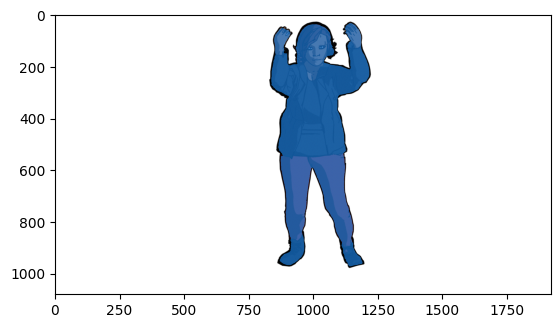

In [76]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
plt.imshow(image)

mask=masks[0]
color = np.array([30/255, 144/255, 255/255, 0.6])
h, w = mask.shape[-2:]
mask = mask.astype(np.uint8)
mask_image =  mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
plt.gca().imshow(mask_image)

#show_anns(masks[0])
plt.show()

##Segment all the video

In [77]:
import os
from sam2.build_sam import build_sam2_video_predictor

def RGB_to_opencv(c):
    return c[::-1]

#COLOR PALETTE (from segment.py from lester-code)
np.random.seed(200)
_palette = ((np.random.random((3*255))*0.7+0.3)*255).astype(np.uint8).tolist()
_palette = [0,0,0]+_palette
#c = _palette[id*3:id*3+3] USAGE

#Build our own dictionary for the colors
palette = {}
for i in range(255):
    palette[i] = _palette[i*3:i*3+3]


sam2_checkpoint = "sam2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

scene_path = "data/scenes/"+scene


#load frames
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = scene_path+"/imagesFull"
# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

#initialize inference state
inference_state = predictor.init_state(video_path=video_dir)

ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 0  # give a unique id to each object we interact with (it can be any integers)

for mask_points in masks_points:
    print("add_new_points_or_box for ann_obj_id="+str(ann_obj_id))
    print(mask_points[0])
    points = mask_points[0]
    labels = mask_points[1]
    _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
        inference_state=inference_state,
        frame_idx=ann_frame_idx,
        obj_id=ann_obj_id,
        points=points,
        labels=labels,
    )
    ann_obj_id = ann_obj_id+1;


#PROPAGATION STAGE
output_path = scene_path+"/samtrack"
if not os.path.exists(output_path):
    os.makedirs(output_path)

#obtain dimensions of the image
first_frame = cv2.imread(os.path.join(video_dir, frame_names[0]))
height, width, channels = first_frame.shape

#Propagate the prompts to get the masklet across the video
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    print("frame done")
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }
    blank_image_BGR = np.zeros((height,width,3), np.uint8)
    blank_image_BGR[:] = 255
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        print("showing out_frame_idx="+str(out_frame_idx)+"/out_obj_id="+str(out_obj_id))
        mask = out_mask
        color = np.array([30/255, 144/255, 255/255, 0.6])
        h, w = mask.shape[-2:]
        mask = mask.astype(np.uint8)
        mask_image =  mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

        #mask is a vector of 0s and 1s.
        #reshaping it as a matrix becomes a mask useful in opencv
        binary_mask = mask.reshape(h,w)

        #create a white blank image (3 channels)
        #blank_image_BGR = np.zeros((h,w,3), np.uint8)
        #blank_image_BGR[:] = 255

        #apply a color using the mask
        blank_image_BGR[binary_mask==1]=RGB_to_opencv(palette[(out_obj_id+10*1)%256])

    #save
    #cv2.imwrite(output_path+"/f"+str(out_frame_idx)+".png", blank_image_BGR)
    frame_filename_no_extension = os.path.splitext(frame_names[out_frame_idx])[0]
    cv2.imwrite(output_path+"/"+frame_filename_no_extension+'.png', blank_image_BGR)



frame loading (JPEG): 100%|██████████| 4/4 [00:00<00:00, 11.03it/s]


add_new_points_or_box for ann_obj_id=0
[[1000.  400.]
 [ 980.   80.]
 [ 900.  600.]
 [1100.  750.]
 [ 900.  210.]
 [1150.  220.]
 [ 950.  900.]
 [1150.  950.]
 [ 500.  200.]]


/content/lineartanimdata/sam2/sam2_video_predictor.py:961: UserWarning: cannot import name '_C' from 'sam2' (/content/lineartanimdata/sam2/__init__.py)

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(
propagate in video:   0%|          | 0/4 [00:00<?, ?it/s]

frame done
showing out_frame_idx=0/out_obj_id=0


propagate in video:  50%|█████     | 2/4 [00:01<00:01,  1.70it/s]

frame done
showing out_frame_idx=1/out_obj_id=0


propagate in video:  75%|███████▌  | 3/4 [00:02<00:00,  1.25it/s]

frame done
showing out_frame_idx=2/out_obj_id=0


propagate in video: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

frame done
showing out_frame_idx=3/out_obj_id=0


#5. OTHER STEPS

In [3]:
!python step2_foreground.py data/scenes/{scene}
!python step3_cluster_color.py data/scenes/{scene}

process(data/scenes/prova/samtrack/001.png, data/scenes/prova/out_foreground/)
process(data/scenes/prova/samtrack/002.png, data/scenes/prova/out_foreground/)
process(data/scenes/prova/samtrack/003.png, data/scenes/prova/out_foreground/)
process(data/scenes/prova/samtrack/004.png, data/scenes/prova/out_foreground/)
process(data/scenes/prova/out_foreground/001.png, data/scenes/prova/out_clustercolor/)
process(data/scenes/prova/out_foreground/002.png, data/scenes/prova/out_clustercolor/)
process(data/scenes/prova/out_foreground/003.png, data/scenes/prova/out_clustercolor/)
process(data/scenes/prova/out_foreground/004.png, data/scenes/prova/out_clustercolor/)


In [4]:
!python src/maria.py --input /content/lineartanimdata/data/scenes/{scene}
!python step5_overlap_sketch.py data/scenes/{scene}

process(/content/lineartanimdata/data/scenes/prova/out_clustercolor/001.png, /content/lineartanimdata/data/scenes/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/prova/out_clustercolor/002.png, /content/lineartanimdata/data/scenes/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/prova/out_clustercolor/003.png, /content/lineartanimdata/data/scenes/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/prova/out_clustercolor/004.png, /content/lineartanimdata/data/scenes/prova/out_sketch_fromclustercolor/)
process(data/scenes/prova/out_sketch_fromclustercolor/001.png, data/scenes/prova/out_overlap_sketch/)
process(data/scenes/prova/out_sketch_fromclustercolor/002.png, data/scenes/prova/out_overlap_sketch/)
process(data/scenes/prova/out_sketch_fromclustercolor/003.png, data/scenes/prova/out_overlap_sketch/)
process(data/scenes/prova/out_sketch_fromclustercolor/004.png, data/scenes/prova/out_overlap_s

#6. CHECK RESULTS

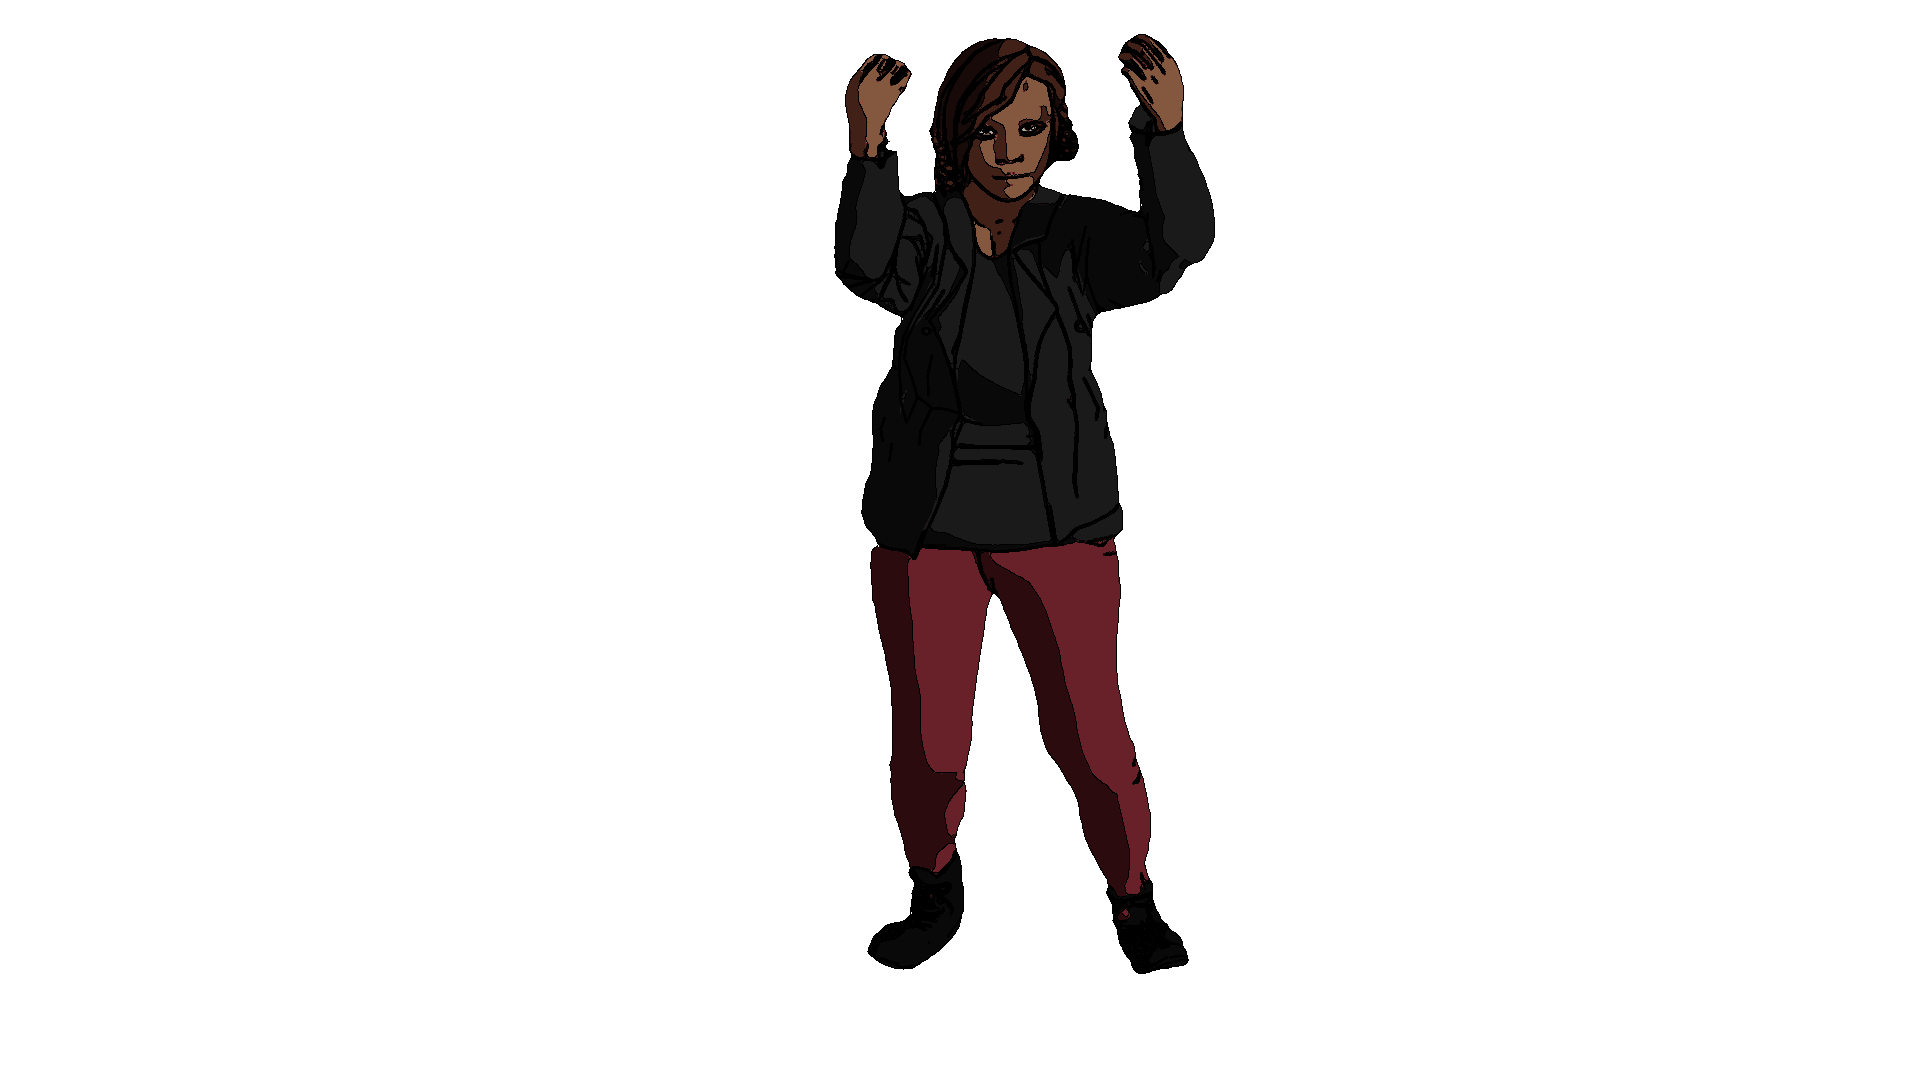

In [5]:
from IPython.display import Image
Image('data/scenes/'+scene+'/out_overlap_sketch/001.png')

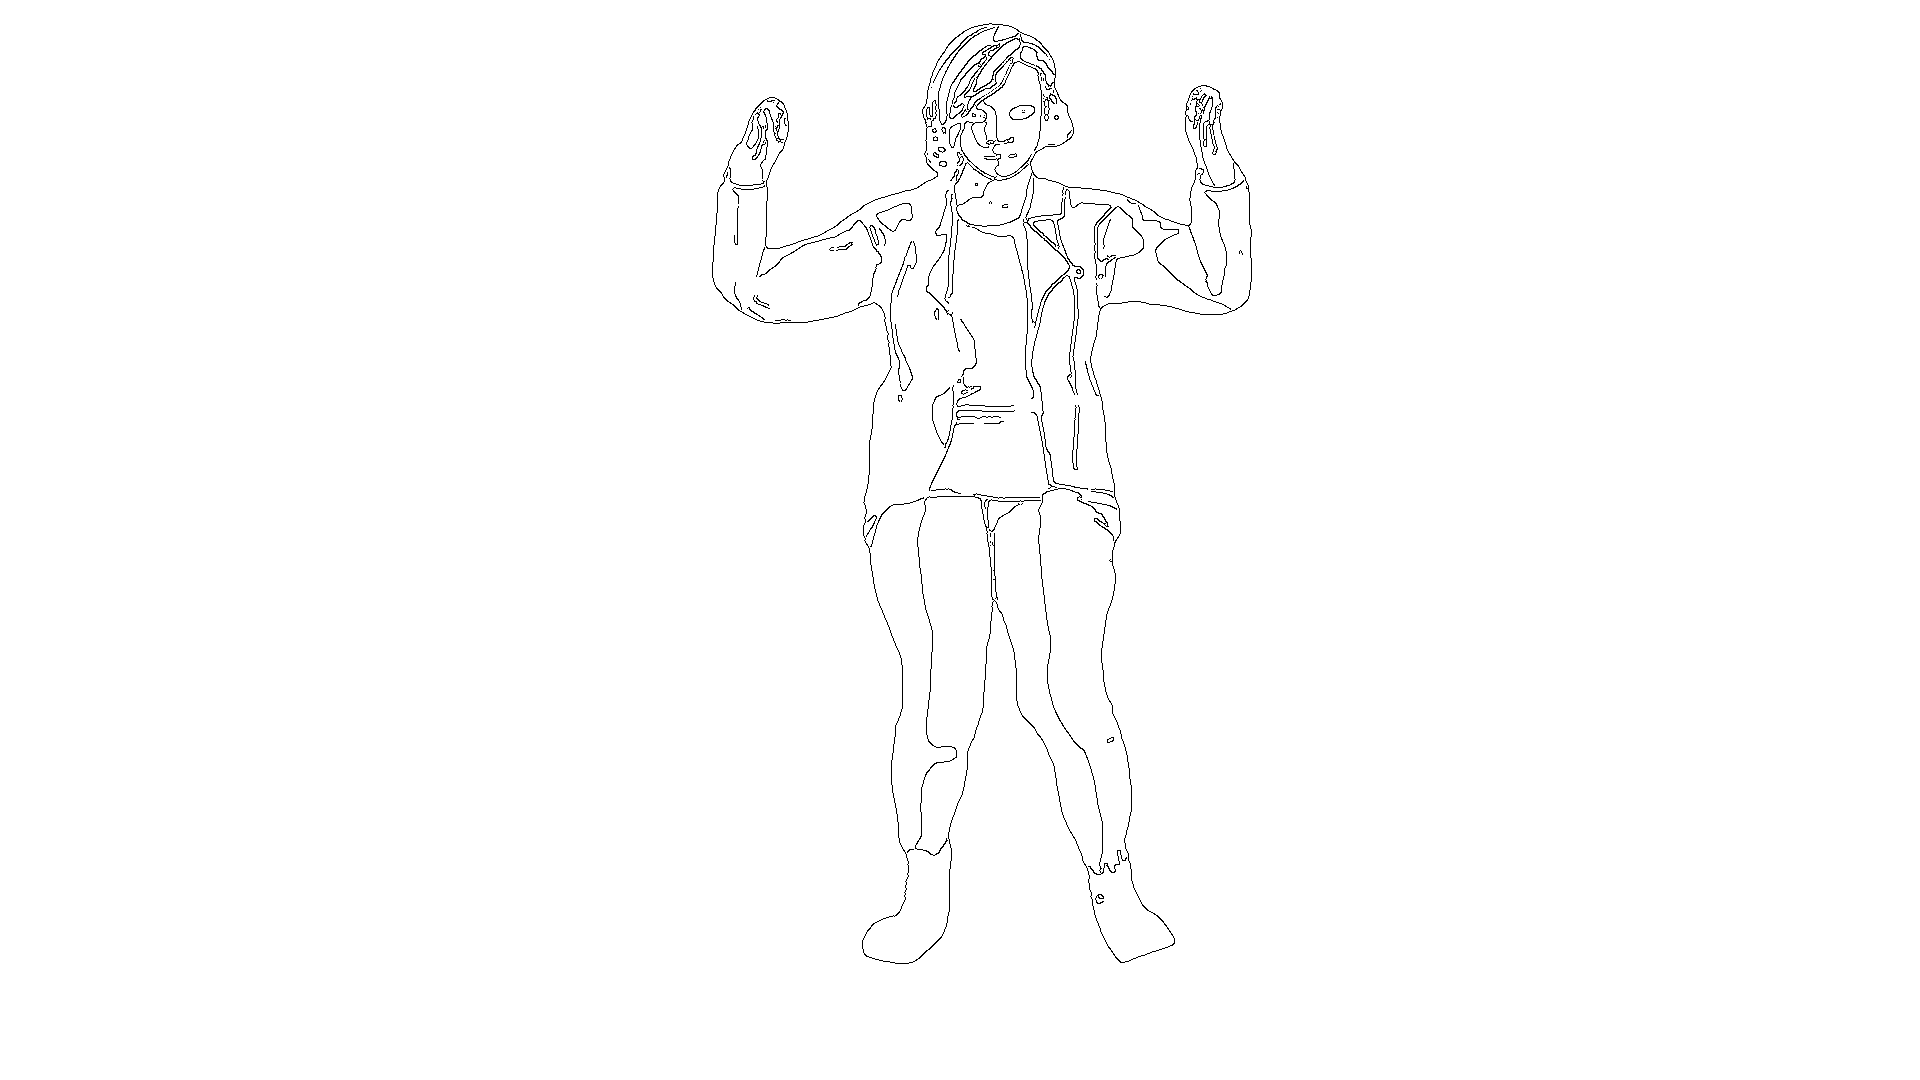

In [6]:
Image('data/scenes/'+scene+'/out_overlap_sketchalpha/004.png')

#7. DOWNLOAD RESULTS

In [ ]:
!rm -f scene+"_color.zip"
#Download the color+lineart frames
!zip -r -qq {scene}_color.zip data/scenes/{scene}/out_overlap_sketch/
from google.colab import files
files.download(scene+"_color.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
!rm -f scene+"_lineart.zip"
#Download the lineart frames
!zip -r -qq {scene}_lineart.zip data/scenes/{scene}/out_overlap_sketchalpha/
from google.colab import files
files.download(scene+"_lineart.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
!rm -f scene+"_all.zip"
#Download all, including intermediate results (slow)
!zip -r -qq {scene}_all.zip data/scenes/{scene}/
from google.colab import files
files.download(scene+"_all.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#COMPROVACIÓ VALOR PÍXELS

In [3]:
import io
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# ... (rest of your existing code)

# Code to upload an image
print("Choose an image file from your computer.")
uploaded = files.upload()
image_file = [key for key in uploaded.keys()][0]

Choose an image file from your computer.


Saving 0000.png to 0000.png
Error displaying image: name 'Image' is not defined


In [44]:
import cv2
import numpy as np

# Carrega la imatge (assegura't que tingui el canal alpha) /content/lineartanimdata/05_img_CELSHADER_COL.png
imatge = cv2.imread('051.png', cv2.IMREAD_UNCHANGED)

# Separa els canals RGBA
b, g, r, alpha = cv2.split(imatge)

# Recorre tots els píxels i verifica si el canal alpha és 0
for y in range(imatge.shape[0]):
    for x in range(imatge.shape[1]):
        if alpha[y, x] == 0:  # Si el píxel és transparent
            print(f"Píxel ({x}, {y}): RGB = ({r[y, x]}, {g[y, x]}, {b[y, x]}) i Alpha = {alpha[y, x]}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Píxel (962, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (963, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (964, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (965, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (966, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (967, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (968, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (969, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (970, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (971, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (972, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (973, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (974, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (975, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (976, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (977, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (978, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (979, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (980, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (981, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (982, 3): RGB = (0, 0, 0) i Alpha = 0
Píxel (983, 3):

KeyboardInterrupt: 

# IMATGES RUBÈN

Proves d'extracció de línies amb imatges ja segmentades d'en Ruben, però no amb el mateix format que extreu sam2 (a veure què passa)

In [2]:
#Run this code block to upload a dataset zip from your computer
import io
import pandas as pd
from google.colab import files

print("Choose a zip file from your computer.")
uploaded = files.upload()
zip_file=[key for key in uploaded.keys()][0]
!unzip zip_file.zip -d  data/scenes/test

Choose a zip file from your computer.


Saving prova_ruben.zip to prova_ruben.zip


* Procurar que el format de les imatge de imagesFull, coincideixen amb el requerir a step2_foreground.py (.jpg)

In [33]:
!python lineartanimdata/step2_foreground.py lineartanimdata/data/scenes/test/prova
!python lineartanimdata/step3_cluster_color.py lineartanimdata/data/scenes/test/prova

process(lineartanimdata/data/scenes/test/prova/samtrack/001.png, lineartanimdata/data/scenes/test/prova/out_foreground/)
process(lineartanimdata/data/scenes/test/prova/samtrack/002.png, lineartanimdata/data/scenes/test/prova/out_foreground/)
process(lineartanimdata/data/scenes/test/prova/samtrack/003.png, lineartanimdata/data/scenes/test/prova/out_foreground/)
process(lineartanimdata/data/scenes/test/prova/samtrack/004.png, lineartanimdata/data/scenes/test/prova/out_foreground/)
process(lineartanimdata/data/scenes/test/prova/out_foreground/001.png, lineartanimdata/data/scenes/test/prova/out_clustercolor/)
process(lineartanimdata/data/scenes/test/prova/out_foreground/002.png, lineartanimdata/data/scenes/test/prova/out_clustercolor/)
process(lineartanimdata/data/scenes/test/prova/out_foreground/003.png, lineartanimdata/data/scenes/test/prova/out_clustercolor/)
process(lineartanimdata/data/scenes/test/prova/out_foreground/004.png, lineartanimdata/data/scenes/test/prova/out_clustercolor/)


Executar després de fer les actualitzacions a maria.py:

In [34]:
!python lineartanimdata/src/maria.py --input /content/lineartanimdata/data/scenes/test/prova
!python lineartanimdata/step5_overlap_sketch.py /content/lineartanimdata/data/scenes/test/prova

process(/content/lineartanimdata/data/scenes/test/prova/out_clustercolor/001.png, /content/lineartanimdata/data/scenes/test/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/test/prova/out_clustercolor/002.png, /content/lineartanimdata/data/scenes/test/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/test/prova/out_clustercolor/003.png, /content/lineartanimdata/data/scenes/test/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/test/prova/out_clustercolor/004.png, /content/lineartanimdata/data/scenes/test/prova/out_sketch_fromclustercolor/)
process(/content/lineartanimdata/data/scenes/test/prova/out_sketch_fromclustercolor/001.png, /content/lineartanimdata/data/scenes/test/prova/out_overlap_sketch/)
process(/content/lineartanimdata/data/scenes/test/prova/out_sketch_fromclustercolor/002.png, /content/lineartanimdata/data/scenes/test/prova/out_overlap_sketch/)
process(/content/lineartanimdata/dat

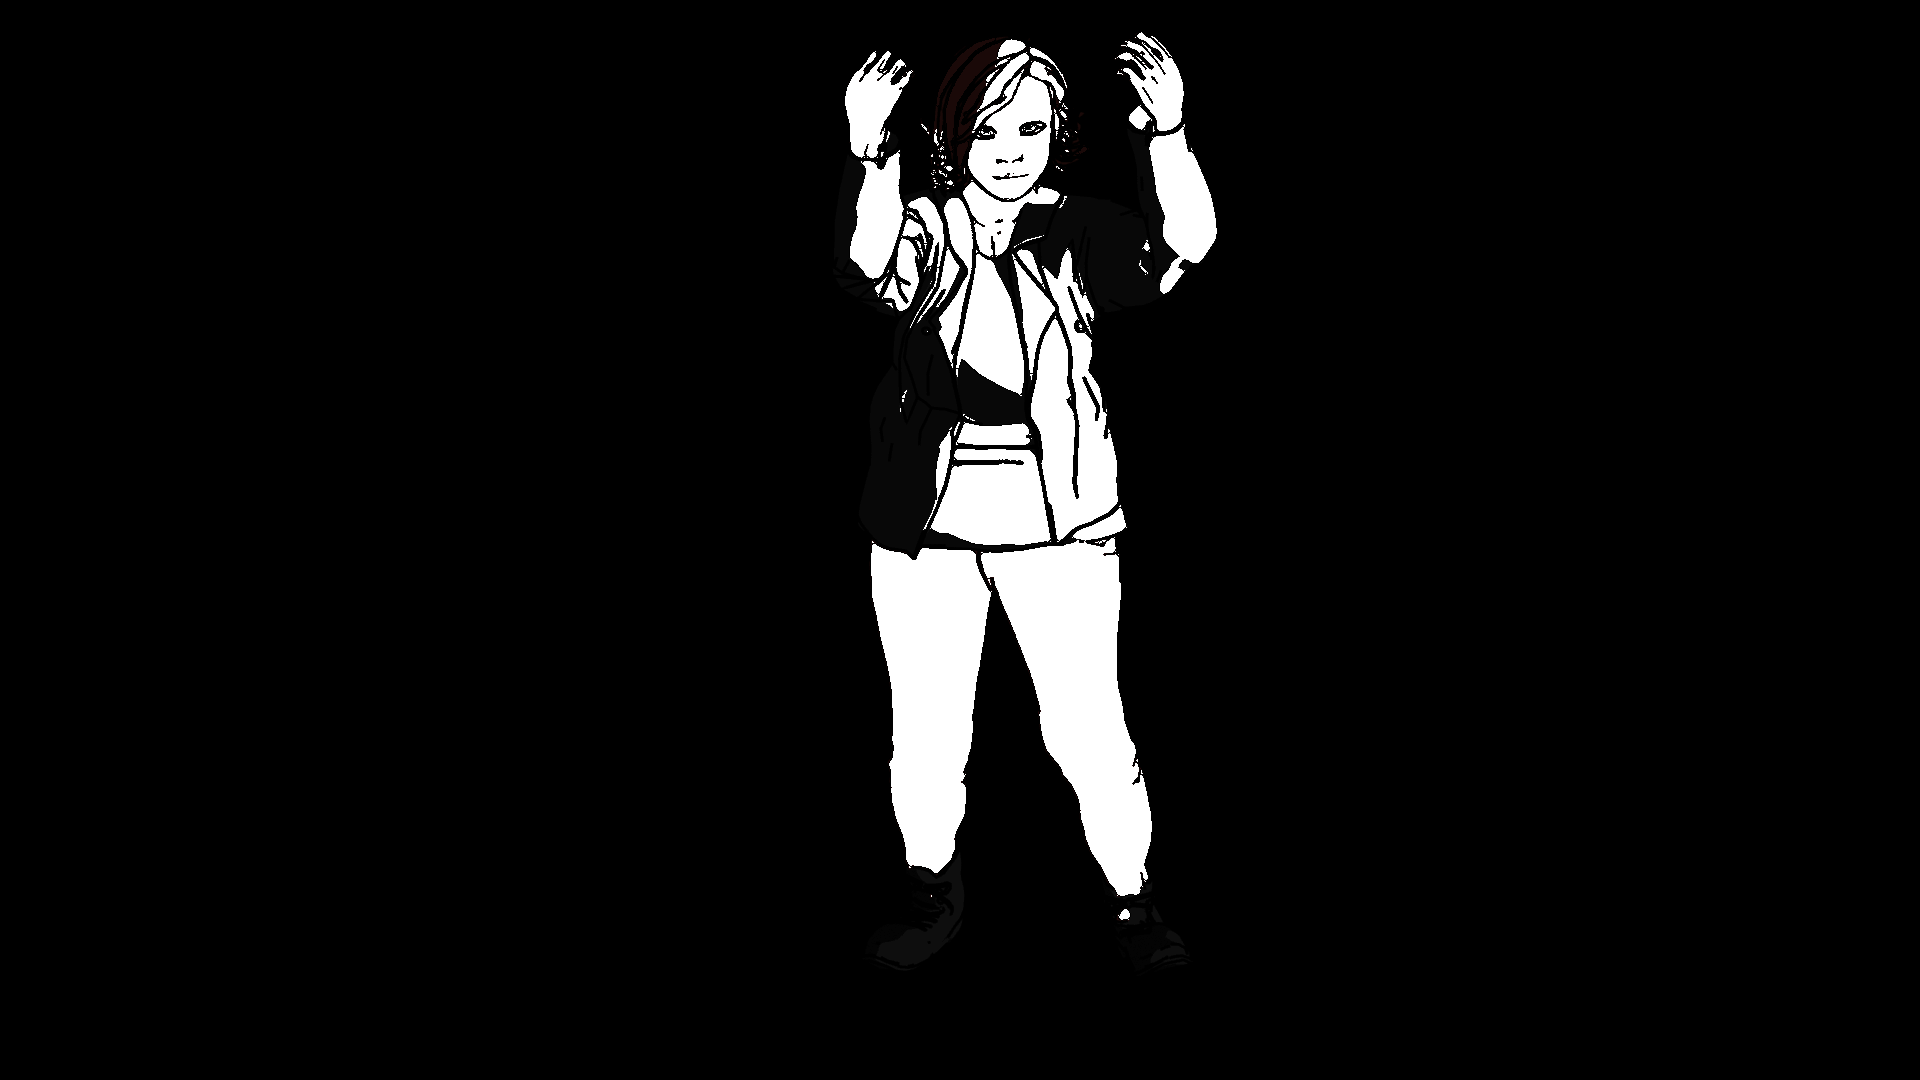

In [35]:
from IPython.display import Image
Image('lineartanimdata/data/scenes/test/prova/out_overlap_sketch/001.png')

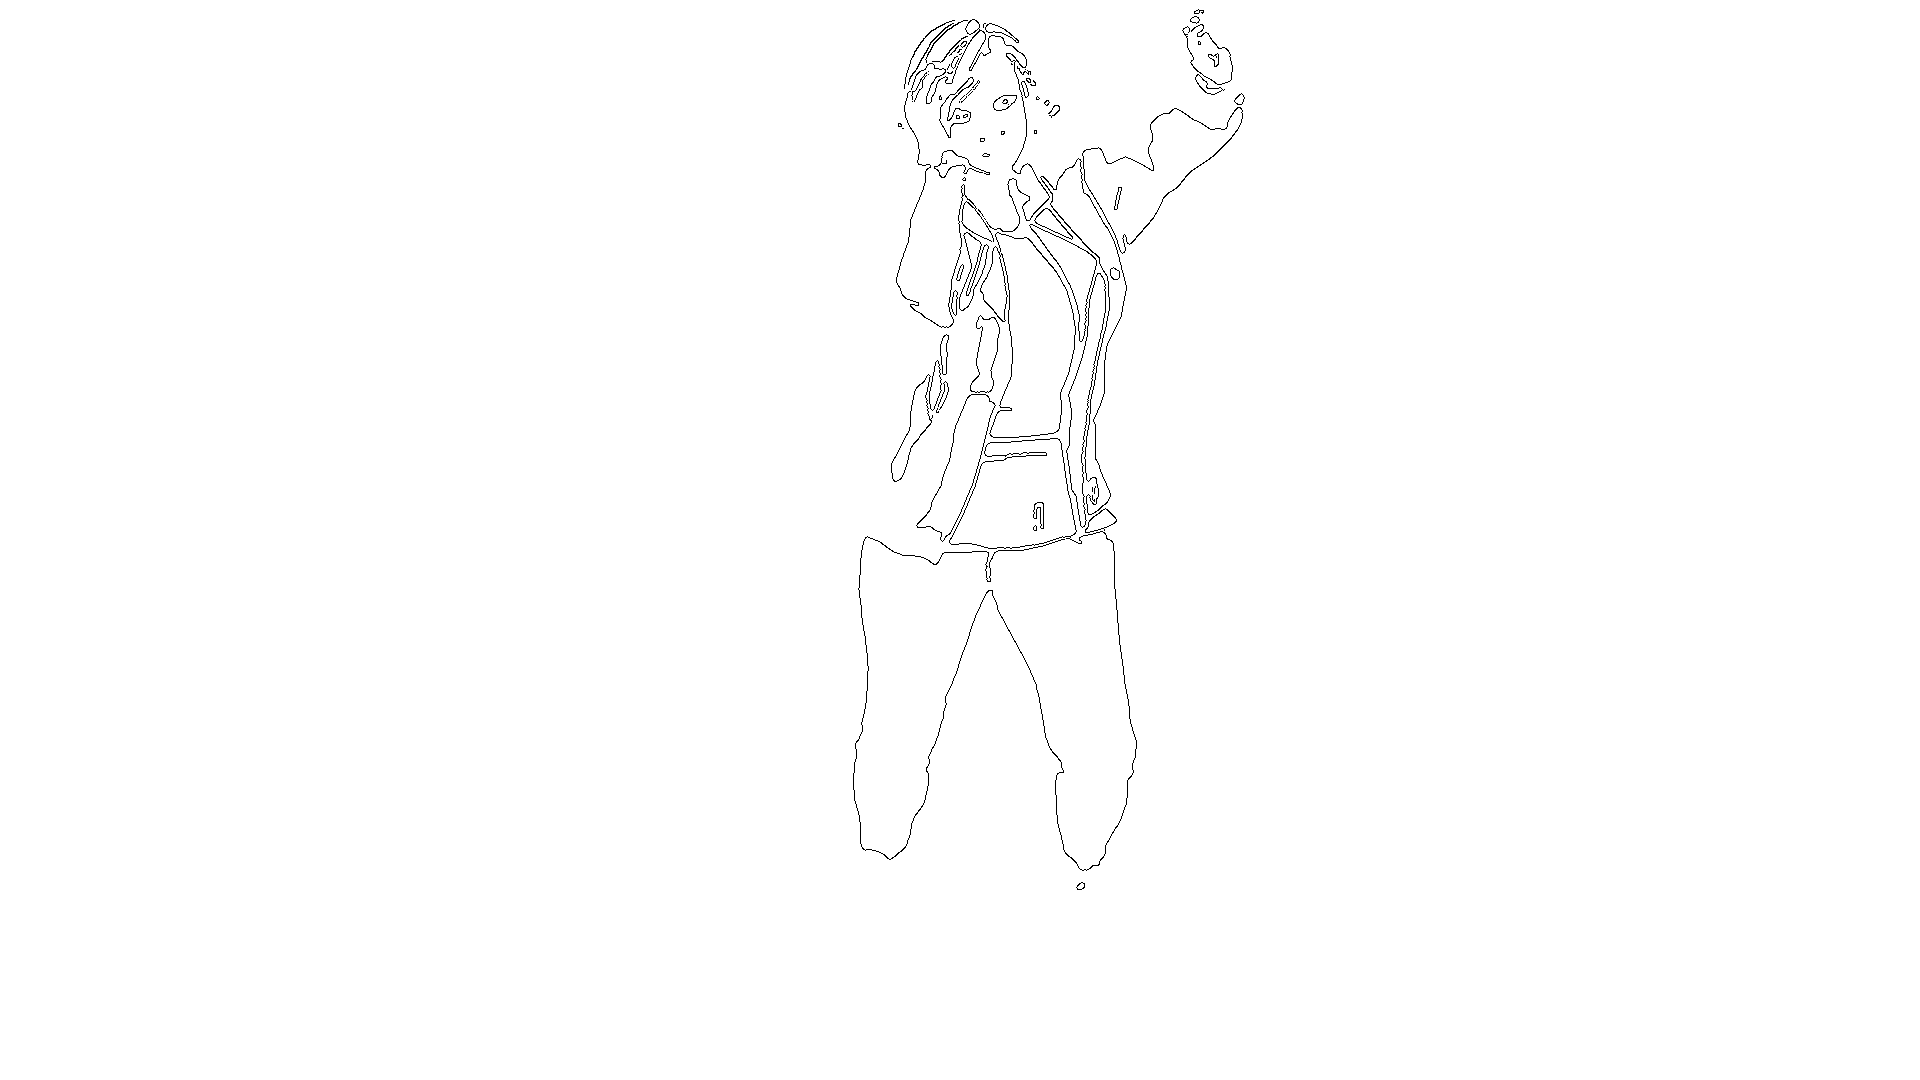

In [36]:
Image('lineartanimdata/data/scenes/test/prova/out_overlap_sketchalpha/003.png')